#📦 Step 1: Install Required Libraries

In [329]:
!pip install opendatasets
!pip install tensorflow

# 📦 Step 2: Import Libraries

In [330]:
# Data handling & analysis
import opendatasets as od
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from imblearn.over_sampling import ADASYN

# Train-test split
from sklearn.model_selection import train_test_split

# Machine Learning Models (Scikit-learn)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import BaggingClassifier

# Deep Learning (TensorFlow/Keras)
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import pickle


#📥 Step 3: Load the Dataset

In [331]:

od.download("https://www.kaggle.com/datasets/ziya07/building-structural-health-sensor-dataset")
data = pd.read_csv("/content/building-structural-health-sensor-dataset/building_health_monitoring_dataset.csv")
data.head()

Skipping, found downloaded files in "./building-structural-health-sensor-dataset" (use force=True to force download)


,Timestamp,Accel_X (m/s^2),Accel_Y (m/s^2),Accel_Z (m/s^2),Strain (με),Temp (°C),Condition Label
0,2025-04-19 00:00:00,0.149014,0.419807,9.742482,61.843849,23.704760,0
1,2025-04-19 00:00:01,-0.041479,0.277390,9.795548,82.792300,24.953195,0
2,2025-04-19 00:00:02,0.194307,0.017889,9.730758,91.727889,25.027025,0
3,2025-04-19 00:00:03,0.456909,-0.194081,9.779204,137.753753,25.708946,0
4,2025-04-19 00:00:04,-0.070246,0.209467,9.620639,111.131062,22.949712,0


# 🔎 Step 4: Explore the Dataset

In [332]:
data.describe()

,Accel_X (m/s^2),Accel_Y (m/s^2),Accel_Z (m/s^2),Strain (με),Temp (°C),Condition Label
count,980.000000,980.000000,980.000000,980.000000,980.000000,1000.000000
mean,0.100986,0.018795,9.811055,111.858121,25.029765,0.409000
std,0.340176,0.297789,0.098196,28.689447,1.521938,0.684242
min,-0.795291,-0.882117,9.508049,41.860236,20.244361,0.000000
25%,-0.144132,-0.182874,9.746165,92.125805,24.036035,0.000000
50%,0.079727,0.016289,9.809975,109.018287,25.059944,0.000000
75%,0.306407,0.217719,9.876602,128.718915,26.045197,1.000000
max,1.337972,0.941325,10.202624,224.861859,29.838898,2.000000


In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        1000 non-null   object 
 1   Accel_X (m/s^2)  980 non-null    float64
 2   Accel_Y (m/s^2)  980 non-null    float64
 3   Accel_Z (m/s^2)  980 non-null    float64
 4   Strain (με)      980 non-null    float64
 5   Temp (°C)        980 non-null    float64
 6   Condition Label  1000 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


In [334]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        1000 non-null   datetime64[ns]
 1   Accel_X (m/s^2)  980 non-null    float64       
 2   Accel_Y (m/s^2)  980 non-null    float64       
 3   Accel_Z (m/s^2)  980 non-null    float64       
 4   Strain (με)      980 non-null    float64       
 5   Temp (°C)        980 non-null    float64       
 6   Condition Label  1000 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 54.8 KB


In [335]:
data[data['Strain (με)'].isna()]

,Timestamp,Accel_X (m/s^2),Accel_Y (m/s^2),Accel_Z (m/s^2),Strain (με),Temp (°C),Condition Label
23,2025-04-19 00:00:23,-0.427424,0.642681,9.679118,NaN,26.175384,0
176,2025-04-19 00:02:56,0.173803,-0.507887,9.649234,NaN,24.986067,1
224,2025-04-19 00:03:44,-0.141580,-0.055586,9.745063,NaN,22.939896,0
271,2025-04-19 00:04:31,-0.430759,0.182741,9.761277,NaN,24.214403,0
273,2025-04-19 00:04:33,0.003070,-0.094923,9.813415,NaN,23.380396,0
280,2025-04-19 00:04:40,0.034055,0.040062,9.637419,NaN,28.139797,0
282,2025-04-19 00:04:42,0.475805,0.212433,9.929411,NaN,26.739072,0
300,2025-04-19 00:05:00,0.072552,-0.200427,9.915195,NaN,25.170620,2
325,2025-04-19 00:05:25,-0.364257,-0.592640,9.876874,NaN,26.554454,0
392,2025-04-19 00:06:32,0.192279,0.604016,9.660347,NaN,27.100028,2


# 📊 Step 5: Visualize Data

array([[<Axes: title={'center': 'Timestamp'}>,
        <Axes: title={'center': 'Accel_X (m/s^2)'}>,
        <Axes: title={'center': 'Accel_Y (m/s^2)'}>],
       [<Axes: title={'center': 'Accel_Z (m/s^2)'}>,
        <Axes: title={'center': 'Strain (με)'}>,
        <Axes: title={'center': 'Temp (°C)'}>],
       [<Axes: title={'center': 'Condition Label'}>, <Axes: >, <Axes: >]],
      dtype=object)

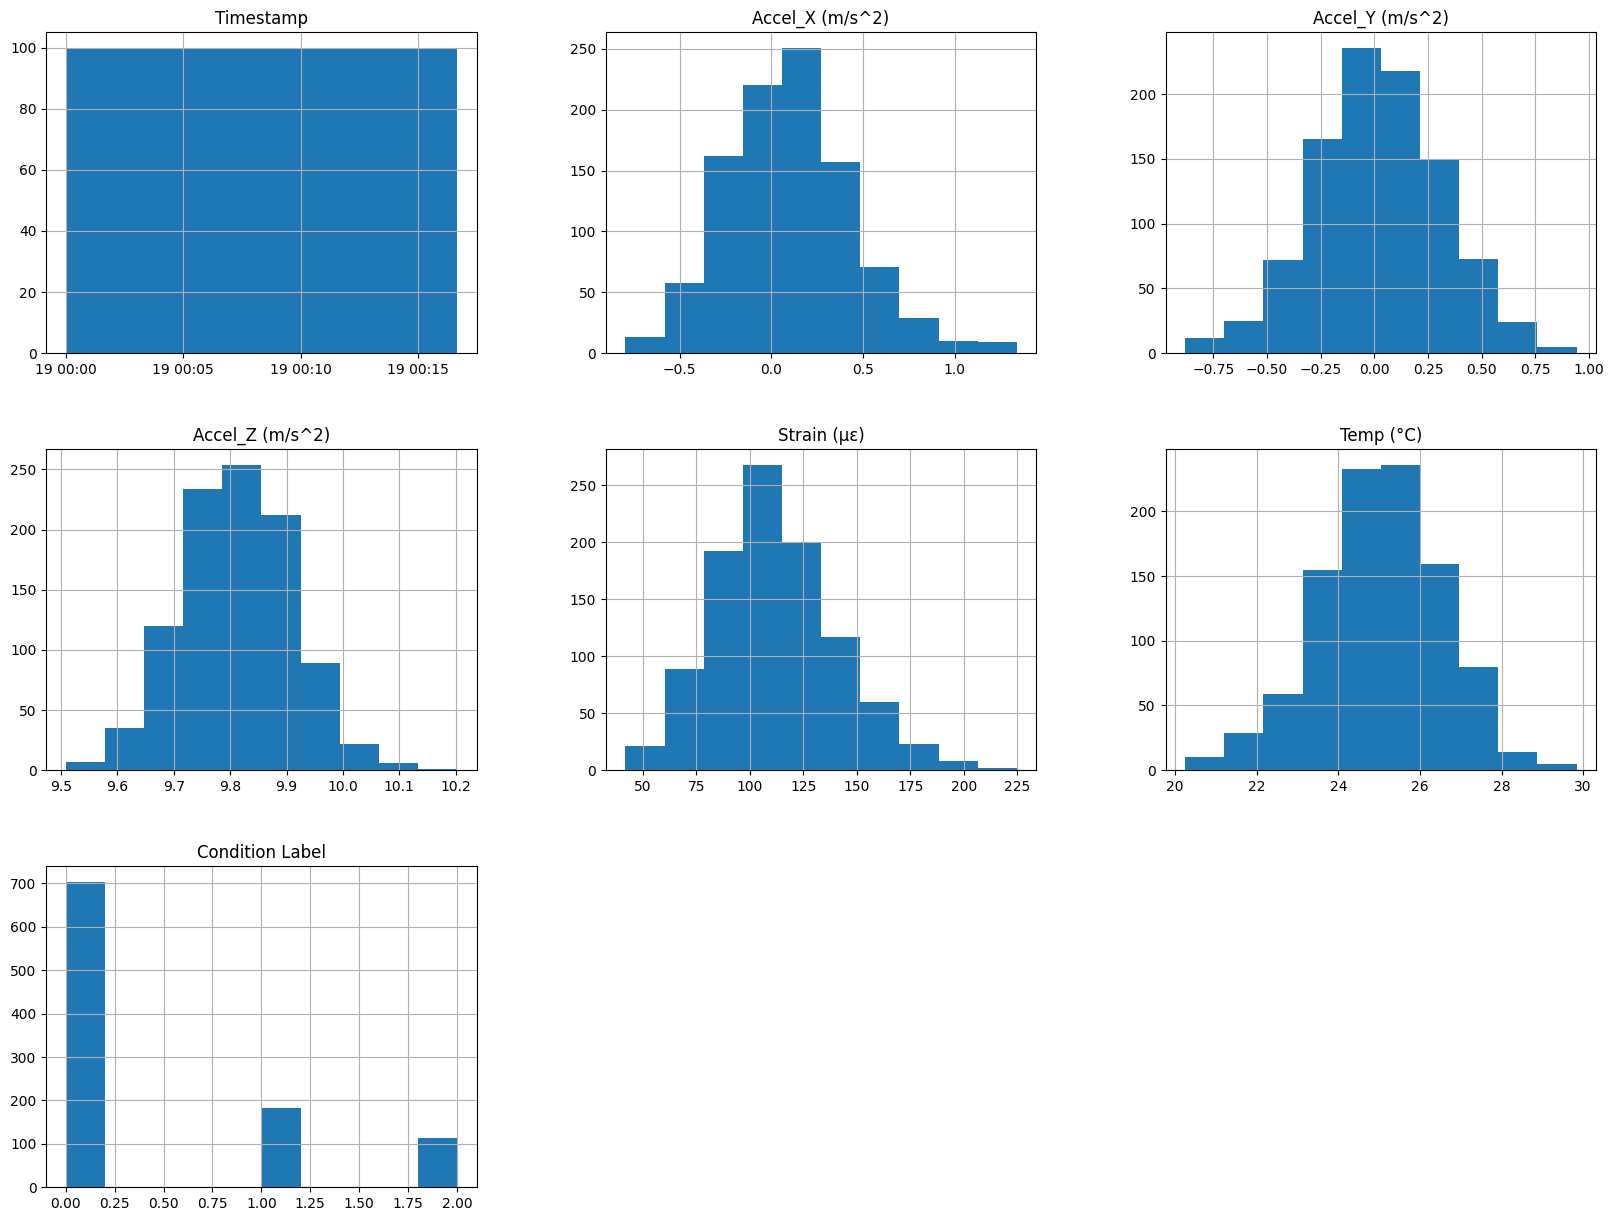

In [336]:
data.hist(figsize=(20,15))

In [337]:
plt.figure(figsize=(20,15))
for i in data.select_dtypes(include="float64").columns:
  px.box(data, x=data[i], title=i).show()


<Figure size 2000x1500 with 0 Axes>

In [338]:
for col in data.select_dtypes(include="float64").columns:
  q1, q3 = data[col].quantile([0.25, 0.75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  print(f"{col}: {len(data[(data[col] <= lower_bound) | (data[col] >= upper_bound)])}")

Accel_X (m/s^2): 14
Accel_Y (m/s^2): 7
Accel_Z (m/s^2): 10
Strain (με): 15
Temp (°C): 12


## Fill Nulls

In [339]:
for col in data.select_dtypes(include="float64").columns:
  data[col].fillna(data[col].median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        1000 non-null   datetime64[ns]
 1   Accel_X (m/s^2)  1000 non-null   float64       
 2   Accel_Y (m/s^2)  1000 non-null   float64       
 3   Accel_Z (m/s^2)  1000 non-null   float64       
 4   Strain (με)      1000 non-null   float64       
 5   Temp (°C)        1000 non-null   float64       
 6   Condition Label  1000 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 54.8 KB


/tmp/ipython-input-3609203889.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [340]:
# data.hist(figsize=(20,15))

In [341]:
# sns.heatmap(data.corr(numeric_only=True), annot=True)

In [342]:
# data

In [343]:
# data["total_accel"] = np.sqrt(data["Accel_X (m/s^2)"]**2 + data["Accel_Y (m/s^2)"]**2 + data["Accel_Z (m/s^2)"]**2)
# data.head()

In [344]:
# px.bar(data.groupby("Condition Label").size().reset_index(), x="Condition Label", y=0, title="Condition Label", labels={"0":"Count"}).show()

In [345]:
# for i in range(1, len(data.columns) - 1):
#   px.box(data, x=data.columns[i], title=data.columns[i]).show()

In [346]:
# for i in range(1, len(data.columns) - 1):
#   px.histogram(data, x=data.columns[i], title=data.columns[i]).show()

In [347]:

# px.scatter(data_frame=data, x="Accel_X (m/s^2)", y="Strain (με)", color="Condition Label")

In [348]:
# px.scatter_3d(data_frame=data, x="Accel_X (m/s^2)", y="Accel_Y (m/s^2)", z="Accel_Z (m/s^2)", color="Condition Label")

In [349]:
px.scatter_3d(data_frame=data, x="Accel_X (m/s^2)", y="Strain (με)", z="Temp (°C)", color="Condition Label")

In [350]:
accel_data = data[data.columns[1:4]]
accel_data

,Accel_X (m/s^2),Accel_Y (m/s^2),Accel_Z (m/s^2)
0,0.149014,0.419807,9.742482
1,-0.041479,0.277390,9.795548
2,0.194307,0.017889,9.730758
3,0.456909,-0.194081,9.779204
4,-0.070246,0.209467,9.620639
...,...,...,...
995,0.113365,0.321045,9.817748
996,1.295021,-0.007956,9.835775
997,0.192253,-0.264562,9.685824
998,-0.171354,-0.048920,9.843418


In [351]:
# data.drop(columns=data.columns[1:4], inplace=True)
# data

In [352]:
# data["Condition Label"].value_counts()

In [650]:
zero_condition_data = data.loc[data['Condition Label'] == 0].sample(n=450, random_state=42)
one_condition_data = data.loc[data['Condition Label'] == 1]
two_condition_data = data.loc[data['Condition Label'] == 2]

under_sample_data = pd.concat([zero_condition_data, one_condition_data, two_condition_data])

# Shuffle dataframe rows
under_sample_data = under_sample_data.sample(frac=1, random_state=42)
# under_sample_data["Timestamp"] = pd.to_datetime(under_sample_data["Timestamp"])


under_sample_data.head()

,Timestamp,Accel_X (m/s^2),Accel_Y (m/s^2),Accel_Z (m/s^2),Strain (με),Temp (°C),Condition Label
57,2025-04-19 00:00:57,-0.092764,0.351819,9.897439,104.087781,25.672954,0
638,2025-04-19 00:10:38,-0.386988,0.618757,9.706748,97.525346,21.973992,0
127,2025-04-19 00:02:07,-0.169889,-0.226283,9.921432,126.366046,27.698088,0
117,2025-04-19 00:01:57,-0.350603,-0.017286,9.710565,84.884170,22.164985,0
140,2025-04-19 00:02:20,0.068238,-0.089269,9.826476,116.935416,25.928329,0


In [651]:
under_sample_data["Condition Label"].value_counts()

,count
Condition Label,
0,450
1,183
2,113


In [652]:

# X = data.drop(columns=["Condition Label", "Timestamp"])
# y = data["Condition Label"]
# adasyn = ADASYN(sampling_strategy='minority', random_state=42)
# X_resampled, y_resampled = adasyn.fit_resample(X, y)

# over_sample_data = pd.concat([X_resampled, y_resampled], axis=1)

# X = over_sample_data.drop(columns=["Condition Label"])
# y = over_sample_data["Condition Label"]
# adasyn = ADASYN(sampling_strategy='minority', random_state=42)
# X_resampled, y_resampled = adasyn.fit_resample(X, y)

# over_sample_data = pd.concat([X_resampled, y_resampled], axis=1)


# print("Oversampled data shape:", over_sample_data.shape)
# over_sample_data.head()

In [653]:
# over_sample_data["Condition Label"].value_counts()

In [654]:
# over_sample_data.info()

In [655]:
# over_sample_data.hist(figsize=(20,15))

In [656]:
# data.drop(columns=["Timestamp"], inplace=True)

In [657]:
under_sample_data.drop(columns=["Timestamp"], inplace=True)

In [658]:
# data.tail()

In [659]:
# data.hist(figsize=(20,15))

In [660]:
# x = data.drop(columns=["Condition Label"])
# y = data["Condition Label"]
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42, stratify=y_test)
# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# x_val = scaler.transform(x_val)



dataTotal.hist(figsize=(20,15))

In [661]:
# data.head()

In [662]:
# sns.heatmap(data.corr(numeric_only=True), annot=True)

to download the clean data run this code

In [663]:
# data.to_csv("processed_data.csv", index=False)
# from google.colab import files
# files.download("processed_data.csv")



# Modeling

## 1-Modeling with normal data

In [664]:
# LR = LogisticRegression(class_weight="balanced")
# LR.fit(x_train, y_train)
# y_pred = LR.predict(x_val)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [665]:

# DT = DecisionTreeClassifier(class_weight="balanced",max_depth=3)
# DT.fit(x_train, y_train)
# y_pred = DT.predict(x_val)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))


In [666]:
# max_depth = [None,1,2,3,4,5,6,7,8,9,10]
# features = [1,2,3,4,5]

# best_acc = 0
# best_params = {}
# best_report = None
# best_matrix = None

# for i in max_depth:
#     for j in features:
#         DT = DecisionTreeClassifier(class_weight="balanced",
#                                     max_depth=i,
#                                     max_features=j,
#                                     random_state=42)
#         DT.fit(x_train, y_train)
#         y_pred = DT.predict(x_val)

#         acc = accuracy_score(y_val, y_pred)

#         if acc > best_acc:
#             best_acc = acc
#             best_params = {"max_depth": i, "max_features": j}
#             best_report = classification_report(y_val, y_pred)
#             best_matrix = confusion_matrix(y_val, y_pred)

# print("Parameters:", best_params)
# print("Accuracy:", best_acc)
# print("Confusion Matrix:\n", best_matrix)
# print("Classification Report:\n", best_report)




In [667]:
# RF = RandomForestClassifier(class_weight="balanced", n_estimators=100, max_depth=3)
# RF.fit(x_train,y_train)
# y_pred = RF.predict(x_val)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [668]:
# knn = KNeighborsClassifier(n_neighbors=9)
# knn.fit(x_train, y_train)
# y_pred = knn.predict(x_val)
# knn.predict(x_val)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [669]:
# svm = SVC(class_weight="balanced", C=1)
# svm.fit(x_train, y_train)
# y_pred = svm.predict(x_val)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [670]:
# XG = XGBClassifier(class_weight="balanced", n_estimators=100, max_depth=3)
# XG.fit(x_train, y_train)
# y_pred = XG.predict(x_val)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [671]:
# naive_bayes = GaussianNB( )
# naive_bayes.fit(x_train, y_train)
# y_pred = naive_bayes.predict(x_val)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [672]:
# callbacks = [EarlyStopping(monitor='val_loss', patience=15,restore_best_weights=True)]
# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(3, activation='softmax'))
# model.compile(optimizer='adamW', loss='categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(x_train, to_categorical(y_train), epochs=500, batch_size=32, validation_data=(x_val, to_categorical(y_val)),callbacks=callbacks)


In [673]:
# y_pred = model.predict(x_val)
# y_pred = np.argmax(y_pred, axis=1)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))



In [674]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.show()
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='lower right')
# plt.show()


## 2-Modeling with over sampled data

In [675]:
# x = over_sample_data.drop(columns=["Condition Label"])
# y = over_sample_data["Condition Label"]
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
# x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=42,stratify=y_test)



In [676]:
# x_train.head()

In [677]:
# LR = LogisticRegression( )
# LR.fit(x_train, y_train)
# y_pred = LR.predict(x_val)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [678]:

# DT = DecisionTreeClassifier(class_weight="balanced",max_depth=3)
# DT.fit(x_train, y_train)
# y_pred = DT.predict(x_val)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))


In [679]:
# max_depth = [None,1,2,3,4,5,6,7,8,9,10]
# features = [1,2,3,4,5]

# best_acc = 0
# best_params = {}
# best_report = None
# best_matrix = None

# for i in max_depth:
#     for j in features:
#         DT = DecisionTreeClassifier(class_weight="balanced",
#                                     max_depth=i,
#                                     max_features=j,
#                                     random_state=42)
#         DT.fit(x_train, y_train)
#         y_pred = DT.predict(x_val)

#         acc = accuracy_score(y_val, y_pred)

#         if acc > best_acc:
#             best_acc = acc
#             best_params = {"max_depth": i, "max_features": j}
#             best_report = classification_report(y_val, y_pred)
#             best_matrix = confusion_matrix(y_val, y_pred)

# print("Parameters:", best_params)
# print("Accuracy:", best_acc)
# print("Confusion Matrix:\n", best_matrix)
# print("Classification Report:\n", best_report)




In [680]:
# RF = RandomForestClassifier(class_weight="balanced", n_estimators=100, max_depth=3)
# RF.fit(x_train,y_train)
# y_pred = RF.predict(x_val)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [681]:
# knn = KNeighborsClassifier(n_neighbors=9)
# knn.fit(x_train, y_train)
# y_pred = knn.predict(x_val)
# knn.predict(x_val)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [682]:
# svm = SVC(class_weight="balanced", C=1)
# svm.fit(x_train, y_train)
# y_pred = svm.predict(x_val)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [683]:
# XG = XGBClassifier(class_weight="balanced", n_estimators=100, max_depth=3)
# XG.fit(x_train, y_train)
# y_pred = XG.predict(x_val)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [684]:
# naive_bayes = GaussianNB()
# naive_bayes.fit(x_train, y_train)
# y_pred = naive_bayes.predict(x_val)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

In [685]:
# callbacks = [EarlyStopping(monitor='val_loss', patience=15,restore_best_weights=True)]
# model = Sequential()
# model.add(Dense(1024, activation='relu', input_shape=(x_train.shape[1],)))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(3, activation='softmax'))
# model.compile(optimizer='adamW', loss='categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(x_train, to_categorical(y_train), epochs=500, batch_size=32, validation_data=(x_val, to_categorical(y_val)),callbacks=callbacks)


In [686]:
# y_pred = model.predict(x_val)
# y_pred = np.argmax(y_pred, axis=1)
# print(accuracy_score(y_val, y_pred))
# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))



In [687]:
# model.save("saher1.h5")

In [688]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.show()
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='lower right')
# plt.show()


## 3-Modeling with under sampled data

In [689]:
x = under_sample_data.drop(columns=["Condition Label"])
y = under_sample_data["Condition Label"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42, stratify=y_test)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val   = scaler.transform(x_val)
x_test  = scaler.transform(x_test)
with open("minmax_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [690]:
DT = DecisionTreeClassifier( max_depth=4)
DT.fit(x_train, y_train)
y_pred = DT.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


0.7866666666666666
[[40  5  0]
 [ 6 11  2]
 [ 0  3  8]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       0.58      0.58      0.58        19
           2       0.80      0.73      0.76        11

    accuracy                           0.79        75
   macro avg       0.75      0.73      0.74        75
weighted avg       0.79      0.79      0.79        75



In [691]:
max_depth = [None,1,2,3,4,5,6,7,8,9,10]
features = [1,2,3,4,5]

best_acc = 0
best_params = {}
best_report = None
best_matrix = None
best_model = None   # ⬅️ هنا هنخزن أفضل موديل

for i in max_depth:
    for j in features:
        BDT = DecisionTreeClassifier(class_weight="balanced",
                                    max_depth=i,
                                    max_features=j,
                                    random_state=42)
        BDT.fit(x_train, y_train)
        y_pred = BDT.predict(x_val)

        acc = accuracy_score(y_val, y_pred)

        if acc > best_acc:
            best_acc = acc
            best_params = {"max_depth": i, "max_features": j}
            best_report = classification_report(y_val, y_pred)
            best_matrix = confusion_matrix(y_val, y_pred)
            best_model = BDT   # ⬅️ خزّنا نسخة من أفضل موديل

print("Parameters:", best_params)
print("Accuracy:", best_acc)
print("Confusion Matrix:\n", best_matrix)
print("Classification Report:\n", best_report)

# 🔹 حفظ أفضل موديل في ملف pkl
joblib.dump(best_model, "best_decision_tree.pkl")
print("✅ Best model saved as best_decision_tree.pkl")


Parameters: {'max_depth': 4, 'max_features': 4}
Accuracy: 0.8266666666666667
Confusion Matrix:
 [[42  3  0]
 [ 4 12  3]
 [ 0  3  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.67      0.63      0.65        19
           2       0.73      0.73      0.73        11

    accuracy                           0.83        75
   macro avg       0.77      0.76      0.77        75
weighted avg       0.82      0.83      0.82        75

✅ Best model saved as best_decision_tree.pkl


In [692]:
RF = RandomForestClassifier(class_weight="balanced", n_estimators=100, max_depth=3)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.7733333333333333
[[39  6  0]
 [ 6 11  2]
 [ 0  3  8]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        45
           1       0.55      0.58      0.56        19
           2       0.80      0.73      0.76        11

    accuracy                           0.77        75
   macro avg       0.74      0.72      0.73        75
weighted avg       0.78      0.77      0.77        75



In [693]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
knn.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.7333333333333333
[[42  3  0]
 [12  7  0]
 [ 1  4  6]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        45
           1       0.50      0.37      0.42        19
           2       1.00      0.55      0.71        11

    accuracy                           0.73        75
   macro avg       0.75      0.62      0.66        75
weighted avg       0.73      0.73      0.72        75



In [694]:
svm = SVC(class_weight="balanced", C=1)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.76
[[36  9  0]
 [ 4 12  3]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        45
           1       0.52      0.63      0.57        19
           2       0.75      0.82      0.78        11

    accuracy                           0.76        75
   macro avg       0.72      0.75      0.73        75
weighted avg       0.78      0.76      0.77        75



In [695]:
XG = XGBClassifier(class_weight="balanced", n_estimators=100, max_depth=3)
XG.fit(x_train, y_train)
y_pred = XG.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.7066666666666667
[[39  6  0]
 [ 9  6  4]
 [ 1  2  8]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        45
           1       0.43      0.32      0.36        19
           2       0.67      0.73      0.70        11

    accuracy                           0.71        75
   macro avg       0.63      0.64      0.63        75
weighted avg       0.68      0.71      0.69        75



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[11:22:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.




In [696]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred = ada.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.7333333333333333
[[38  7  0]
 [ 8 10  1]
 [ 0  4  7]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        45
           1       0.48      0.53      0.50        19
           2       0.88      0.64      0.74        11

    accuracy                           0.73        75
   macro avg       0.73      0.67      0.69        75
weighted avg       0.74      0.73      0.74        75



In [697]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
y_pred = naive_bayes.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.8133333333333334
[[40  5  0]
 [ 6 12  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       0.63      0.63      0.63        19
           2       0.90      0.82      0.86        11

    accuracy                           0.81        75
   macro avg       0.80      0.78      0.79        75
weighted avg       0.81      0.81      0.81        75



In [698]:
callbacks = [EarlyStopping(monitor='val_loss', patience=15,restore_best_weights=True)]
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adamW', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, to_categorical(y_train), epochs=500, batch_size=32, validation_data=(x_val, to_categorical(y_val)),callbacks=callbacks)


Epoch 1/500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.6288 - loss: 1.0190 - val_accuracy: 0.6000 - val_loss: 0.8958
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6121 - loss: 0.8843 - val_accuracy: 0.6800 - val_loss: 0.7410
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6568 - loss: 0.7431 - val_accuracy: 0.6800 - val_loss: 0.6466
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6910 - loss: 0.6785 - val_accuracy: 0.6800 - val_loss: 0.6119
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7116 - loss: 0.6606 - val_accuracy: 0.7733 - val_loss: 0.5704
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6880 - loss: 0.6345 - val_accuracy: 0.7733 - val_loss: 0.5473
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7346 - loss: 0.5520 - val_accuracy: 0.7200 - val_loss: 0.5282
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7106 - loss: 0.6210 - val_accuracy: 0.7733 - val_loss: 0.

In [699]:
y_pred = model.predict(x_val)
y_pred = np.argmax(y_pred, axis=1)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
0.8
[[38  7  0]
 [ 4 14  1]
 [ 0  3  8]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        45
           1       0.58      0.74      0.65        19
           2       0.89      0.73      0.80        11

    accuracy                           0.80        75
   macro avg       0.79      0.77      0.77        75
weighted avg       0.82      0.80      0.81        75



In [700]:
model.save("saher2.h5")

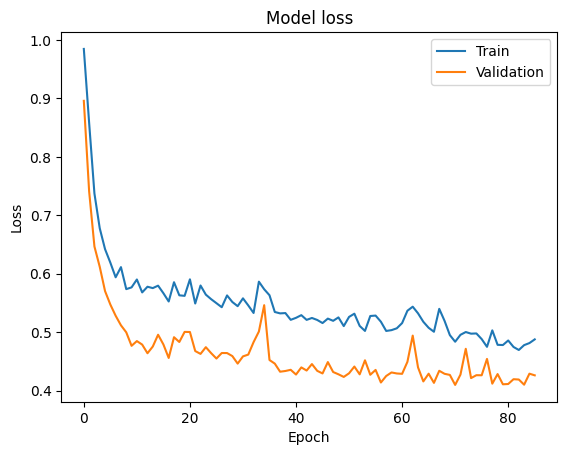

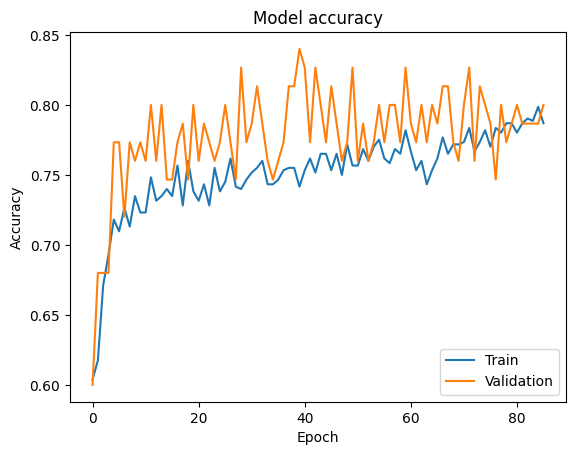

In [701]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


In [702]:
under_sample_data.head()

,Accel_X (m/s^2),Accel_Y (m/s^2),Accel_Z (m/s^2),Strain (με),Temp (°C),Condition Label
57,-0.092764,0.351819,9.897439,104.087781,25.672954,0
638,-0.386988,0.618757,9.706748,97.525346,21.973992,0
127,-0.169889,-0.226283,9.921432,126.366046,27.698088,0
117,-0.350603,-0.017286,9.710565,84.884170,22.164985,0
140,0.068238,-0.089269,9.826476,116.935416,25.928329,0


In [703]:
data.head()

,Timestamp,Accel_X (m/s^2),Accel_Y (m/s^2),Accel_Z (m/s^2),Strain (με),Temp (°C),Condition Label
0,2025-04-19 00:00:00,0.149014,0.419807,9.742482,61.843849,23.704760,0
1,2025-04-19 00:00:01,-0.041479,0.277390,9.795548,82.792300,24.953195,0
2,2025-04-19 00:00:02,0.194307,0.017889,9.730758,91.727889,25.027025,0
3,2025-04-19 00:00:03,0.456909,-0.194081,9.779204,137.753753,25.708946,0
4,2025-04-19 00:00:04,-0.070246,0.209467,9.620639,111.131062,22.949712,0
